# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("ex1data1.csv")
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


### Visualiser les données

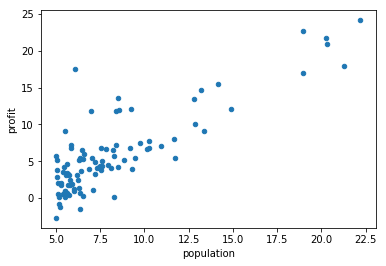

In [5]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [6]:
X = np.array(data['population'])
y = np.array(data['profit'])

In [7]:
print(X)

[  6.1101   5.5277   8.5186   7.0032   5.8598   8.3829   7.4764   8.5781
   6.4862   5.0546   5.7107  14.164    5.734    8.4084   5.6407   5.3794
   6.3654   5.1301   6.4296   7.0708   6.1891  20.27     5.4901   6.3261
   5.5649  18.945   12.828   10.957   13.176   22.203    5.2524   6.5894
   9.2482   5.8918   8.2111   7.9334   8.0959   5.6063  12.836    6.3534
   5.4069   6.8825  11.708    5.7737   7.8247   7.0931   5.0702   5.8014
  11.7      5.5416   7.5402   5.3077   7.4239   7.6031   6.3328   6.3589
   6.2742   5.6397   9.3102   9.4536   8.8254   5.1793  21.279   14.908
  18.959    7.2182   8.2951  10.236    5.4994  20.341   10.136    7.3345
   6.0062   7.2259   5.0269   6.5479   7.5386   5.0365  10.274    5.1077
   5.7292   5.1884   6.3557   9.7687   6.5159   8.5172   9.1802   6.002
   5.5204   5.0594   5.7077   7.6366   5.8707   5.3054   8.2934  13.394
   5.4369]


## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [8]:
theta = np.zeros(2)

In [9]:
print(theta)

[ 0.  0.]


### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [10]:
def predict(X, theta):
    y = theta[0] + theta[1] * X
    return y

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [11]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = len(X)
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        err = predict(X, theta) - y 
        theta[0] -= (alpha / m) * err.sum()
        theta[1] -= (alpha / m) * np.dot(err, X)
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [21]:
alpha = 0.01
num_iters = 1500
theta = fit(X, y, theta, alpha, num_iters)
print(theta)

[-3.70968912  1.17433871]


## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [22]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

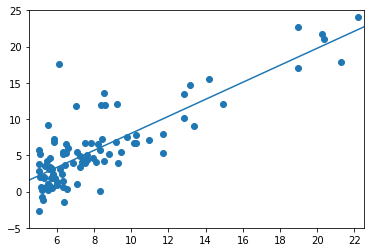

In [23]:
visualize(theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [24]:
def cost(X, y, theta):
    m = len(X)
    j = (1 / (2 * m)) * np.sum((predict(X, theta) - y) ** 2)
    return j


In [25]:
print(cost(X, y, theta))

4.48012408393


In [26]:
theta[0] = 0
theta[1] = 0

### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [27]:
print(cost(X, y, theta))

32.0727338775


In [28]:
theta[0] = -1
theta[1] = 2

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [29]:
print(cost(X, y, theta))

54.242455082


### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [30]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history= []
    for i in range(num_iters):
        err = predict(X, theta) - y 
        theta[0] -= (alpha / m) * err.sum()
        theta[1] -= (alpha / m) * np.dot(err, X)
        J_history.append(cost(X, y, theta))
    return theta, J_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [31]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [32]:
theta_fin, J_history_fin = fit_with_cost(X, y, theta, 0.01, 1500)
J_history_fin[1450:]

[4.4846293381523124,
 4.4846017546144843,
 4.4845742704309677,
 4.4845468852438932,
 4.4845195986966848,
 4.4844924104340427,
 4.484465320101954,
 4.4844383273476778,
 4.484411431819745,
 4.4843846331679513,
 4.4843579310433554,
 4.4843313250982719,
 4.4843048149862659,
 4.4842784003621539,
 4.4842520808819932,
 4.4842258562030821,
 4.4841997259839506,
 4.4841736898843605,
 4.4841477475652987,
 4.484121898688973,
 4.4840961429188075,
 4.4840704799194411,
 4.4840449093567161,
 4.4840194308976837,
 4.483994044210589,
 4.4839687489648767,
 4.4839435448311793,
 4.4839184314813174,
 4.4838934085882922,
 4.4838684758262843,
 4.4838436328706468,
 4.4838188793979006,
 4.4837942150857346,
 4.4837696396129987,
 4.4837451526596963,
 4.4837207539069874,
 4.4836964430371786,
 4.4836722197337178,
 4.4836480836811985,
 4.4836240345653495,
 4.4836000720730267,
 4.4835761958922182,
 4.4835524057120333,
 4.4835287012227072,
 4.483505082115582,
 4.4834815480831196,
 4.4834580988188826,
 4.483434734017542

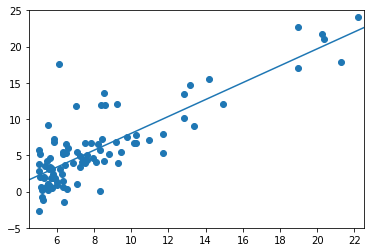

In [33]:
visualize(theta_fin)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

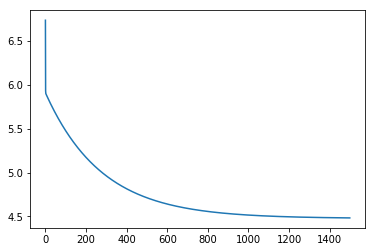

In [34]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history_fin)